In [19]:
import os
import numpy as np
import re
from collections import Counter
global accur
accur=[]
class Perceptron:
    def __init__(self, num_features):
        self.weights = np.zeros(num_features) 
        self.learning_rate = 0.1

    def predict(self, x):
        return 1 if np.dot(self.weights, x) > 0 else 0

    def train(self, X_train, y_train, num_epochs,X_test,y_test):
        global accur
        for epoch in range(num_epochs):
            for x, y in zip(X_train, y_train):
                prediction = self.predict(x)
                x = np.array(x)  
                self.weights += self.learning_rate * (y - prediction) * x  
            correct = 0
            for x, y in zip(X_test, y_test):
                prediction_t = perceptron.predict(x)
                if prediction_t == y:
                    correct += 1
            total = len(X_test)
            acc = correct / total
            global accur
            accur.append(acc)
        



def preprocess_email(email):
    
    email = re.sub(r'\W+', ' ', email.lower())

    return email.split()

def extract_features(emails):
    features = []
    for email in emails:
        words = preprocess_email(email)
        word_counts = Counter(words)
        features.append([word_counts[word] for word in vocabulary])
    return features


def load_emails_from_folder(folder):
    emails = []
    for filename in os.listdir(folder):
        with open(os.path.join(folder, filename), 'r', encoding='utf-8', errors='ignore') as file:
            emails.append(file.read())
    return emails



spam_folder = r'E:\dataset_fin\spam'
ham_folder = r'E:\dataset_fin\ham'
spam_emails = load_emails_from_folder(spam_folder)
ham_emails = load_emails_from_folder(ham_folder)


split_ratio = 0.8
split_index_spam = int(len(spam_emails) * split_ratio)
split_index_ham = int(len(ham_emails) * split_ratio)


all_emails = spam_emails + ham_emails
words = [preprocess_email(email) for email in all_emails]
word_counts = Counter([word for sublist in words for word in sublist])
vocabulary = [word for word, _ in word_counts.most_common(5000)] 


X_spam = extract_features(spam_emails)
X_ham = extract_features(ham_emails)

# Create labels
y_spam = [1] * len(spam_emails)
y_ham = [0] * len(ham_emails)

# Split data into training and testing sets
X_train = X_spam[:split_index_spam] + X_ham[:split_index_ham]
y_train = y_spam[:split_index_spam] + y_ham[:split_index_ham]
X_test = X_spam[split_index_spam:] + X_ham[split_index_ham:]
y_test = y_spam[split_index_spam:] + y_ham[split_index_ham:]

# Initialize and train perceptron
perceptron = Perceptron(len(vocabulary))
perceptron.train(X_train, y_train, num_epochs=2000,X_test=X_test,y_test=y_test)

# Test perceptron
correct = 0
total = len(X_test)
for x, y in zip(X_test, y_test):
    prediction = perceptron.predict(x)
    if prediction == y:
        correct += 1

accuracy = correct / total
print("Accuracy:", accuracy)


Accuracy: 0.9443779108449767


In [20]:
import matplotlib.pyplot as plt

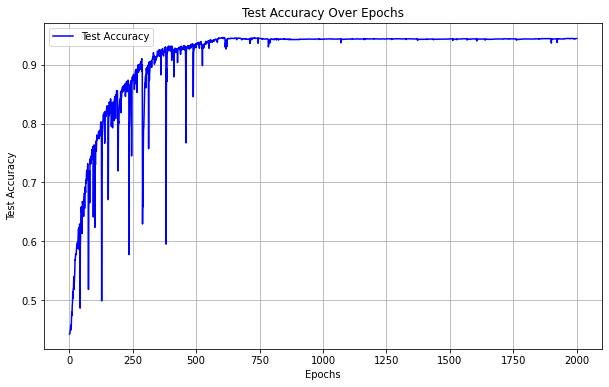

In [26]:
epochs = range(1, len(accur) + 1)  # Number of epochs is determined by the length of the list

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(epochs, accur, 'b', label='Test Accuracy')
plt.title('Test Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
import pickle

# Save weights to a file
with open('perceptron_weights_2000.pkl', 'wb') as f:
    pickle.dump(perceptron.weights, f)



In [23]:
# Load weights from the saved file
with open('perceptron_weights.pkl', 'rb') as f:
    saved_weights = pickle.load(f)

# Create a new perceptron with the loaded weights
loaded_perceptron = Perceptron(len(saved_weights))
loaded_perceptron.weights = saved_weights


In [24]:

correct = 0
total = len(X_test)
for x, y in zip(X_test, y_test):
    prediction = loaded_perceptron.predict(x)
    if prediction == y:
        correct += 1

accuracy = correct / total
print("Accuracy:", accuracy)


Accuracy: 0.9443779108449767
